In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import Holt,ExponentialSmoothing

In [3]:
df=pd.read_csv("./stockmarcket.csv")

In [4]:
df.head()

,Date,Price
0,2018-01-01,1843.0
1,2018-01-02,1703.0
2,2018-01-03,1735.0
3,2018-01-04,1678.0
4,2018-01-05,1584.0


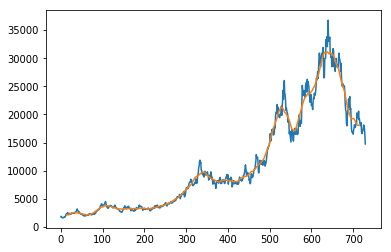

In [5]:
plt.plot(df.Price)
plt.plot(df.Price.rolling(window=30).mean().shift(-15))

In [6]:
dftest = adfuller(df.Price)

In [7]:
dftest

(-1.3142590285662177,
 0.622623805569876,
 0,
 729,
 {'1%': -3.4393520240470554,
  '10%': -2.5688855736949163,
  '5%': -2.8655128165959236},
 11374.555455731956)

In [8]:
normal=np.random.normal(0,1,1000)

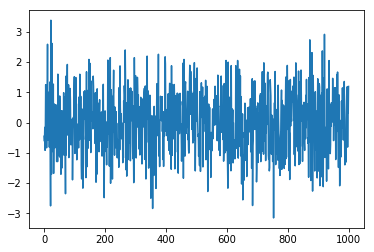

In [9]:
plt.plot(normal)

In [10]:
print(" > Is the data stationary ?")
dftest = adfuller(normal)
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -16.947
P-value = 0.000
Critical values :
	1%: -3.4369259442540416 - The data is  stationary with 99% confidence
	5%: -2.8644432969122833 - The data is  stationary with 95% confidence
	10%: -2.5683158550174094 - The data is  stationary with 90% confidence


In [11]:
dfdif=df.Price.diff()

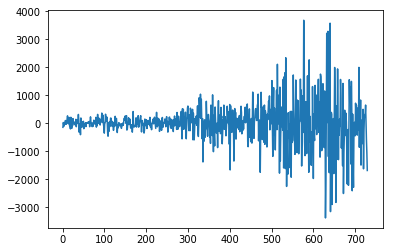

In [12]:
plt.plot(dfdif)

In [13]:
dftest = adfuller(dfdif.dropna())#dropna quieta los NaNs

In [14]:
dftest

(-9.174201356919113,
 2.3439995743722776e-15,
 7,
 721,
 {'1%': -3.4394522667904153,
  '10%': -2.568909106765338,
  '5%': -2.8655569894909805},
 11359.456420400034)

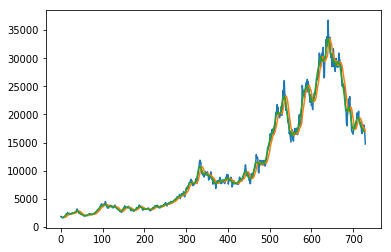

In [15]:
plt.plot(df.Price)
plt.plot(df.Price.rolling(window=10).mean())
plt.plot(df.Price.rolling(window=10).mean().shift(-5))

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
print(" > Is the data stationary ?")
dftest = adfuller(df.Price)
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -1.314
P-value = 0.623
Critical values :
	1%: -3.4393520240470554 - The data is not stationary with 99% confidence
	5%: -2.8655128165959236 - The data is not stationary with 95% confidence
	10%: -2.5688855736949163 - The data is not stationary with 90% confidence


In [18]:
df2=df.Price-df.Price.rolling(window=6).mean().shift(-3)
df2=df2[~np.isnan(df2)]

In [19]:
print(" > Is the data stationary ?")
dftest = adfuller(df2)
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -14.822
P-value = 0.000
Critical values :
	1%: -3.439477677285233 - The data is  stationary with 99% confidence
	5%: -2.865568186630048 - The data is  stationary with 95% confidence
	10%: -2.5689150720653977 - The data is  stationary with 90% confidence


In [20]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


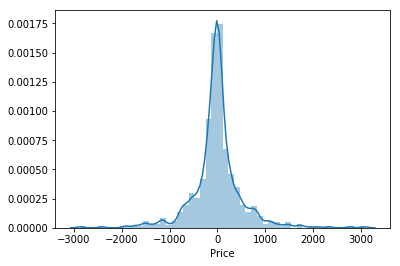

In [21]:
sns.distplot(df2)

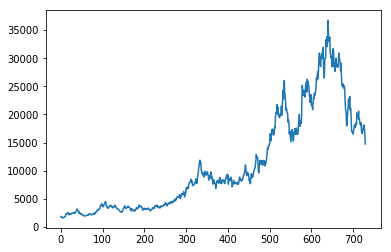

In [22]:
plt.plot(df.Price)


In [67]:
model = ExponentialSmoothing(np.log(df.Price[:-50]))
fit1 = model.fit()
pred1 = fit1.forecast(50)
fit2 = model.fit(smoothing_level=.5)
pred2 = fit2.forecast(50)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


(400, 750)

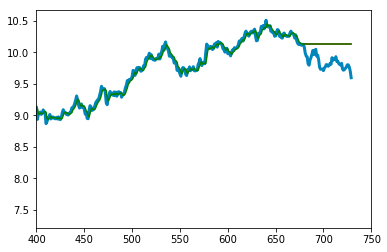

In [69]:
plt.plot(np.log(df.Price),c='#0085BD',lw=3)
#plt.plot(fit1.fittedvalues,c='r')
plt.plot(pred1,c='r')
plt.plot(fit2.fittedvalues,c='g')
plt.plot(pred2,c='g')
plt.xlim(400,750)

In [75]:
model = ExponentialSmoothing(np.log(df.Price[:-50]))
#model._index = pd.to_datetime(train.index)

fit1 = model.fit(smoothing_level=.1)
pred1 = fit1.forecast(50)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


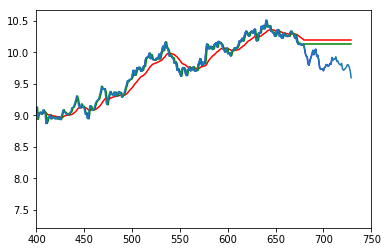

In [76]:
plt.plot(df.index[500:-20], np.log(df.Price[500:-20]),c='b')
plt.plot(fit1.fittedvalues,c='r')
plt.plot(pred1,c='r')
plt.plot(fit2.fittedvalues,c='g')
plt.plot(pred2,c='g')
#plt.plot(fit3.fittedvalues,c='k')
#plt.plot(pred3,c='k')
plt.xlim(400,750)
plt.plot(np.log(df.Price))
#ax.plot(test.index, test.values, color="gray")
#for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
#    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
#    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)

In [77]:
model = Holt(np.log(df.Price[:-50]))
#model._index = pd.to_datetime(train.index)

fit1 = model.fit(smoothing_level=.5, smoothing_slope=.2)
pred1 = fit1.forecast(50)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.


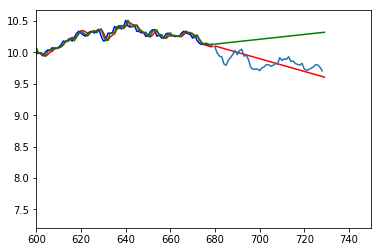

In [79]:
plt.plot(df.index[500:-50], np.log(df.Price[500:-50]),c='b')
plt.plot(fit1.fittedvalues,c='r')
plt.plot(pred1,c='r')
plt.plot(fit2.fittedvalues,c='g')
plt.plot(pred2,c='g')
plt.xlim(600,750)
plt.plot( np.log(df.Price[-50:-1]))
#ax.plot(test.index, test.values, color="gray")
#for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
#    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
#    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  730
Model:                     ARMA(0, 0)   Log Likelihood               -7667.212
Method:                           css   S.D. of innovations           8813.952
Date:                Sat, 05 Sep 2020   AIC                          15338.423
Time:                        14:45:13   BIC                          15347.610
Sample:                             0   HQIC                         15341.968
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.101e+04    326.219     33.748      0.000    1.04e+04    1.16e+04
                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observat

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

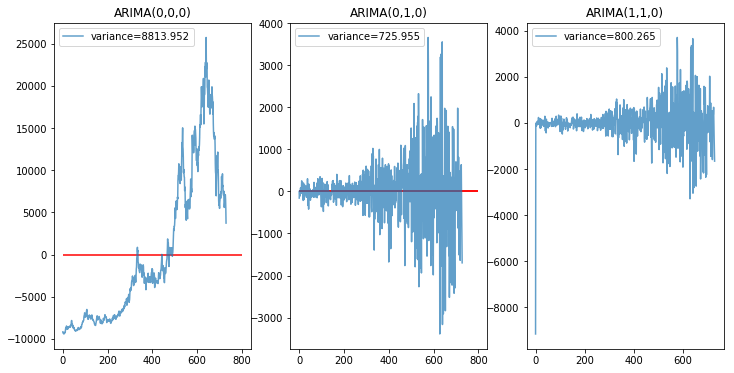

In [30]:
model = ARIMA(df.Price.dropna(), (0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(df.Price.dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

model = ARIMA(df.Price.dropna(), (1, 0, 0))
res_110 = model.fit()
print(res_110.summary())

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=800, color='r');
ax[0].set_title("ARIMA(0,0,0)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=800, color='r');
ax[1].set_title("ARIMA(0,1,0)");
ax[1].legend();
ax[2].plot(res_110.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_110.resid.values)));
ax[1].hlines(0, xmin=0, xmax=800, color='r');
ax[2].set_title("ARIMA(1,1,0)");
ax[2].legend();

In [38]:
df.Price[:-50]

500    15016.0
501    16544.0
502    16460.0
503    15282.0
504    15984.0
505    17262.0
506    16835.0
507    17384.0
508    17274.0
509    16328.0
510    16444.0
511    16648.0
512    17830.0
513    17607.0
514    19718.0
515    20333.0
516    20318.0
517    20751.0
518    21764.0
519    19989.0
520    21284.0
521    19944.0
522    19593.0
523    19532.0
524    19422.0
525    20012.0
526    20100.0
527    19858.0
528    21436.0
529    19846.0
        ...   
650    28640.0
651    30637.0
652    31697.0
653    31323.0
654    28502.0
655    29128.0
656    27843.0
657    27656.0
658    29601.0
659    29979.0
660    28684.0
661    28814.0
662    28388.0
663    28554.0
664    28447.0
665    30016.0
666    30895.0
667    30015.0
668    29722.0
669    29180.0
670    27668.0
671    29095.0
672    26592.0
673    25528.0
674    25002.0
675    25473.0
676    25037.0
677    24671.0
678    25036.0
679    25078.0
Name: Price, Length: 180, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


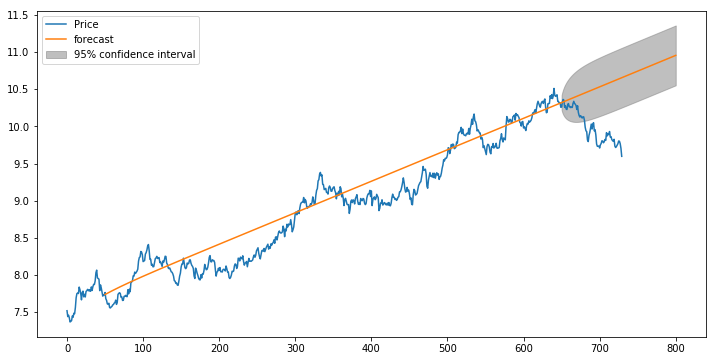

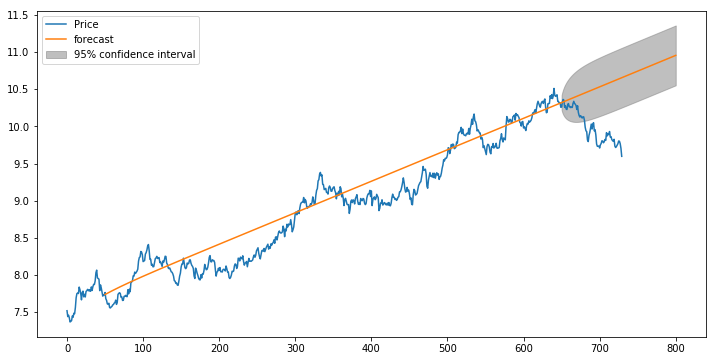

In [65]:
model = ARIMA(np.log(df.Price[0:650]), (1, 1, 1))
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.log(df.Price))
res_111.plot_predict(50,800,dynamic=True,plot_insample=False,ax=ax)
#df.index = pd.to_datetime(df.index, format="%Y-%m")
#np.log(df.Price).dropna()[250:].plot(ax=ax);
#ax.vlines('1992-10', 13, 14.5, linestyle='--', color='r', label='Start of forecast');

# - NOTE from the official documentation :
# -- The dynamic keyword affects in-sample prediction. 
# -- If dynamic is False, then the in-sample lagged values are used for prediction. 
# -- If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables.
#ax=res_111.plot_predict(500,800,dynamic=True, plot_insample=False, ax=ax);